# ノック91 - データを読み込んで確認

In [1]:
import pandas as pd

不動産業者が町の住民に対して実施したアンケートを自然言語処理を用いて分析していく。

In [2]:
#アンケートの読み込み

survey = pd.read_csv("survey.csv")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [3]:
# 欠損値の確認

survey.isnull().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [4]:
# 欠損値の除去

survey.dropna(inplace = True)
survey.isnull().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

# ノック92 - 不要な文字を除外する

アンケートのコメント欄から、「AA」という文字を削除する。

In [5]:
survey_re = survey.copy()

In [6]:
survey_re["comment"]

0               駅前に若者が集まっている(AA駅)
1                スポーツできる場所があるのが良い
2                       子育て支援が嬉しい
3                 保育園に入れる（待機児童なし）
4                       駅前商店街が寂しい
                 ...             
81              小学校の校庭が芝生なのでとても良い
82    ホームページからアンケートを投稿できるようにしてほしい
83                  公園に遊び道具が少なすぎる
84                  もっと公園を増やしてほしい
85                  駅前に駐車場が少ない、不便
Name: comment, Length: 84, dtype: object

In [7]:
survey_re["comment"] = survey_re["comment"].str.replace("AA", "")  
survey_re.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


次に、正規表現を使って()に囲まれた文字を削除していく。

In [8]:
import re

In [9]:
survey_re["comment"] = survey_re["comment"].str.replace(r"\(.*\)", "", regex = True)
survey_re.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


(待機児童なし)が消えていないが、大文字の括弧を使っているためと考えられる。  
これも削除する。

In [10]:
survey_re["comment"] = survey_re["comment"].str.replace(r"\（.*\）", "", regex = True)
survey_re.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


# ノック93 - 文字数をカウントしてヒストグラムを表示

アンケートコメント欄の文字数の長さを計算する。

In [11]:
survey_re["length"] = 0

for i in range(len(survey_re.index)):
    survey_re.iloc[i, 3] = len(survey_re.iloc[i,1])
survey_re.head()

,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


ヒストグラムを表示する。

In [12]:
import matplotlib.pyplot as plt

(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <a list of 10 Patch objects>)

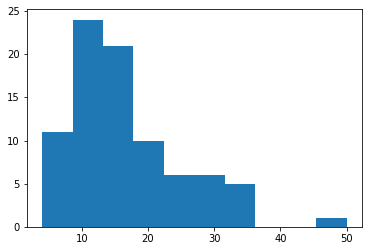

In [13]:
plt.hist(survey_re["length"])

「駅前に若者が集まっている」が12文字だったため、同じくらいの長さの一言コメントが多い事が分かる。

# ノック94 - 形態素解析で文章を分割

「すもももももももものうち」を形態素解析し、品詞ごとに抜き出す。

In [14]:
pip install mecab

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install mecab-python3

Note: you may need to restart the kernel to use updated packages.


In [16]:
import MeCab

In [17]:
pip install unidic-lite

Note: you may need to restart the kernel to use updated packages.


In [18]:
# 形態素に分割

mecab = MeCab.Tagger()
data = "すもももももももものうち"
mecab.parse(data)

'すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nの\tノ\tノ\tの\t助詞-格助詞\t\t\t\nうち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0\nEOS\n'

In [19]:
#品詞毎に改行

lines = mecab.parse(data).split('\n')

In [20]:
#各行の先頭を抜き出す

words = []
for i in range(len(lines)-2):
    words.append(re.split(r"[\t]", lines[i])[0])
words

['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']

# ノック95 - 形態素分析で文章から動詞と名詞を抜き出す

In [54]:
text = "すもももももももものうち"

In [55]:
mecab.parse(text)

'すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nも\tモ\tモ\tも\t助詞-係助詞\t\t\t\nもも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0\nの\tノ\tノ\tの\t助詞-格助詞\t\t\t\nうち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0\nEOS\n'

In [134]:
words = mecab.parse(text).splitlines()
words

['すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0',
 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t',
 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0',
 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t',
 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0',
 'の\tノ\tノ\tの\t助詞-格助詞\t\t\t',
 'うち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0',
 'EOS']

In [155]:
words_lst = []
for i in words:
    if "名詞" in i or "動詞" in i :
        words_lst.append(i.split()[0])
words_lst        

['すもも', 'もも', 'もも', 'うち']

# ノック96 - 頻出する単語を確認

アンケートのコメントの中に出てくる名詞を列挙する。

In [179]:
# コメントをMeCabで抽出

comment = []
for i in range(len(survey_re.index)):
    comment.append(mecab.parse(survey_re.iloc[i,1]))
comment

# ノック95の容量で名詞のリストを作成
noun_lst = []
for i in range(len(comment)):
    ext_comment= comment[i].splitlines()
    for j in ext_comment:
        if "名詞" in j:
            noun_lst.append(j.split()[0])
noun_lst 

['駅前',
 '若者',
 'スポーツ',
 '場所',
 '子育て',
 '支援',
 '保育',
 '園',
 '駅前',
 '商店',
 '街',
 '生活',
 '便利',
 '場所',
 '場所',
 '商業',
 '施設',
 '病院',
 '充実',
 'サイクリング',
 'コース',
 '祭り',
 '学校',
 '公園',
 '近く',
 '公園',
 'スーパー',
 '子育て',
 'デート',
 'スポット',
 '商店',
 '街',
 '夜道',
 'ゴミ',
 '処理',
 '楽',
 '映画',
 '館',
 '街路',
 '樹',
 '公園',
 '追加',
 '観光',
 'スポット',
 '子育て',
 '道',
 '都内',
 'アクセス',
 '家賃',
 'BBB',
 '渋滞',
 'なん',
 '商店',
 '街',
 '屋根',
 '雨',
 '商店',
 '街',
 '喫茶',
 '店',
 'スポーツ',
 'ジム',
 '利用',
 'スポーツ',
 'ジム',
 '利用',
 '料金',
 'ママ',
 '支援',
 'バス',
 '自転',
 '車',
 'ランニング',
 '運動',
 '場所',
 '企業',
 '駅前',
 '駐車',
 '場',
 '変',
 'おじ',
 'さん',
 '声',
 '事',
 '警察',
 '巡回',
 '強化',
 '消防',
 '団',
 '安心',
 '災害',
 '時',
 '避難',
 '場所',
 '気',
 '最近',
 '川',
 '氾濫',
 '被害',
 '町',
 '氾濫',
 '防止',
 '説明',
 '信号',
 '交差',
 '点',
 'ｘｘｘ',
 '事故',
 '信号',
 '商店',
 '街',
 '活性',
 '化',
 '活動',
 '行政',
 '後押し',
 '子ども',
 '安全',
 '場所',
 '駅前',
 '駐輪',
 '場',
 '不便',
 '街路',
 '樹',
 '落ち葉',
 '掃除',
 '街路',
 '樹',
 '災害',
 '時',
 '備蓄',
 '状況',
 '歩道',
 '道',
 '安心',
 '地域',
 '自治',
 '体',
 '支援',
 '自治',
 '体',
 '活動',

次に頻出単語別にリストを作る。

In [184]:
import collections

In [192]:
noun_collentions = collections.Counter(noun_lst)

In [209]:
nouns_df = pd.DataFrame(collections.Counter(noun_lst),index=['number'])
nouns_df = nouns_df.T.sort_values('number', ascending = False)
nouns_df.head()

,number
駅前,7
場所,6
街,5
場,5
役所,5


# ノック97 - 関係の無い単語を除去

noun_lstを見てみると、模範解答のような関係の無い単語(「の」等)はほとんど見当たらないため、こちらは省略する。

In [217]:
noun_lst

['駅前',
 '若者',
 'スポーツ',
 '場所',
 '子育て',
 '支援',
 '保育',
 '園',
 '駅前',
 '商店',
 '街',
 '生活',
 '便利',
 '場所',
 '場所',
 '商業',
 '施設',
 '病院',
 '充実',
 'サイクリング',
 'コース',
 '祭り',
 '学校',
 '公園',
 '近く',
 '公園',
 'スーパー',
 '子育て',
 'デート',
 'スポット',
 '商店',
 '街',
 '夜道',
 'ゴミ',
 '処理',
 '楽',
 '映画',
 '館',
 '街路',
 '樹',
 '公園',
 '追加',
 '観光',
 'スポット',
 '子育て',
 '道',
 '都内',
 'アクセス',
 '家賃',
 'BBB',
 '渋滞',
 'なん',
 '商店',
 '街',
 '屋根',
 '雨',
 '商店',
 '街',
 '喫茶',
 '店',
 'スポーツ',
 'ジム',
 '利用',
 'スポーツ',
 'ジム',
 '利用',
 '料金',
 'ママ',
 '支援',
 'バス',
 '自転',
 '車',
 'ランニング',
 '運動',
 '場所',
 '企業',
 '駅前',
 '駐車',
 '場',
 '変',
 'おじ',
 'さん',
 '声',
 '事',
 '警察',
 '巡回',
 '強化',
 '消防',
 '団',
 '安心',
 '災害',
 '時',
 '避難',
 '場所',
 '気',
 '最近',
 '川',
 '氾濫',
 '被害',
 '町',
 '氾濫',
 '防止',
 '説明',
 '信号',
 '交差',
 '点',
 'ｘｘｘ',
 '事故',
 '信号',
 '商店',
 '街',
 '活性',
 '化',
 '活動',
 '行政',
 '後押し',
 '子ども',
 '安全',
 '場所',
 '駅前',
 '駐輪',
 '場',
 '不便',
 '街路',
 '樹',
 '落ち葉',
 '掃除',
 '街路',
 '樹',
 '災害',
 '時',
 '備蓄',
 '状況',
 '歩道',
 '道',
 '安心',
 '地域',
 '自治',
 '体',
 '支援',
 '自治',
 '体',
 '活動',

# ノック98 - 顧客満足度と頻出単語の関係を調べる

顧客満足度と頻出単語を紐づける。  
まずは、ノック96の内容をアレンジする。

In [219]:
# コメントをMeCabで抽出

sat_comment = []
for i in range(len(survey_re.index)):
    sat_comment.append(mecab.parse(survey_re.iloc[i,1]))
sat_comment

['駅前\tエキマエ\tエキマエ\t駅前\t名詞-普通名詞-一般\t\t\t3,0\nに\tニ\tニ\tに\t助詞-格助詞\t\t\t\n若者\tワカモノ\tワカモノ\t若者\t名詞-普通名詞-一般\t\t\t0\nが\tガ\tガ\tが\t助詞-格助詞\t\t\t\n集まっ\tアツマッ\tアツマル\t集まる\t動詞-一般\t五段-ラ行\t連用形-促音便\t3\nて\tテ\tテ\tて\t助詞-接続助詞\t\t\t\nいる\tイル\tイル\t居る\t動詞-非自立可能\t上一段-ア行\t終止形-一般\t0\nEOS\n',
 'スポーツ\tスポーツ\tスポーツ\tスポーツ-sport\t名詞-普通名詞-サ変可能\t\t\t2\nできる\tデキル\tデキル\t出来る\t動詞-非自立可能\t上一段-カ行\t連体形-一般\t2\n場所\tバショ\tバショ\t場所\t名詞-普通名詞-一般\t\t\t0\nが\tガ\tガ\tが\t助詞-格助詞\t\t\t\nある\tアル\tアル\t有る\t動詞-非自立可能\t五段-ラ行\t連体形-一般\t1\nの\tノ\tノ\tの\t助詞-準体助詞\t\t\t\nが\tガ\tガ\tが\t助詞-格助詞\t\t\t\n良い\tヨイ\tヨイ\t良い\t形容詞-非自立可能\t形容詞\t終止形-一般\t1\nEOS\n',
 '子育て\tコソダテ\tコソダテ\t子育て\t名詞-普通名詞-サ変可能\t\t\t2\n支援\tシエン\tシエン\t支援\t名詞-普通名詞-サ変可能\t\t\t0,1\nが\tガ\tガ\tが\t助詞-格助詞\t\t\t\n嬉しい\tウレシー\tウレシイ\t嬉しい\t形容詞-一般\t形容詞\t終止形-一般\t3\nEOS\n',
 '保育\tホイク\tホイク\t保育\t名詞-普通名詞-サ変可能\t\t\t0,1\n園\tエン\tエン\t園\t接尾辞-名詞的-一般\t\t\t\nに\tニ\tニ\tに\t助詞-格助詞\t\t\t\n入れる\tイレル\tイレル\t入れる\t動詞-一般\t下一段-ラ行\t終止形-一般\t0\nEOS\n',
 '駅前\tエキマエ\tエキマエ\t駅前\t名詞-普通名詞-一般\t\t\t3,0\n商店\tショーテン\tショウテン\t商店\t名詞-普通名詞-一般\t\t\t1\n街\tガイ\tガイ\t街\t接尾辞-名詞

In [224]:
# ノック95の容量で名詞と満足度のリストを作成
sat_noun_lst = []
sat_lst = []
for i in range(len(sat_comment)):
    sat_ext_comment= sat_comment[i].splitlines()
    for j in sat_ext_comment:
        if "名詞" in j:
            sat_noun_lst.append(j.split()[0])
            sat_lst.append(survey_re.iloc[i,2]) 

In [237]:
# データフレーム化

ns_df = pd.DataFrame({"名詞" : sat_noun_lst, "満足度" : sat_lst})
ns_df.head()

,名詞,満足度
0,駅前,1
1,若者,1
2,スポーツ,5
3,場所,5
4,子育て,5


次に、単語毎の満足度の平均と総数を調べたデータフレームを作成。

In [269]:
satisfaction = ns_df.groupby("名詞").mean()["満足度"]
noun_counts = ns_df.groupby("名詞").count()["満足度"]
noun_sat = pd.DataFrame({"満足度" : satisfaction, "総数" : noun_counts}, index = ns_df.groupby("名詞").sum().index)
noun_sat.head()

,満足度,総数
名詞,,
BBB,2.0,1
おじ,1.0,1
ごみ,2.0,1
さん,1.0,1
とき,5.0,1


最後に出現回数が3回以上の単語に限定して、満足度の高い単語と低い単語をそれぞれまとめる。

In [278]:
three = noun_sat.loc[noun_sat["総数"] >= 3 ,:]

In [281]:
three.sort_values("満足度").head()

,満足度,総数
名詞,,
駐車,1.000000,4
場,1.000000,5
信号,1.333333,3
駅前,1.428571,7
者,1.500000,4


In [282]:
three.sort_values("満足度", ascending = False).head()

,満足度,総数
名詞,,
子育て,4.333333,3
安心,4.333333,3
スポーツ,3.666667,3
道,3.000000,3
役所,3.000000,5


# ノック99 - アンケート毎の特徴を表現する

各アンケート毎にどんな名詞が含まれているのかが見えるようデータフレーム化する。

In [301]:
import numpy as np

In [358]:
# 基本となるデータフレームを作成する

whole_df = pd.DataFrame(columns = noun_sat.index, index = [])

for i in range(len(survey_re.index)):
    whole_df = whole_df.T
    whole_df[str(i)] = 0
    whole_df = whole_df.T
whole_df

名詞,BBB,おじ,ごみ,さん,とき,なん,まち,アクセス,アンケート,コース,...,隣町,雨,電話,館,駅前,駐車,駐輪,高速,高齢,ｘｘｘ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [360]:
# 単語が含まれている場合には1を入力し、データフレームを作成する

for i in range(len(survey_re.index)):
    for j in range(len(whole_df.columns)):
        if whole_df.columns[j] in survey_re.iloc[i,1]:
            whole_df.iloc[i,j] = 1
whole_df

名詞,BBB,おじ,ごみ,さん,とき,なん,まち,アクセス,アンケート,コース,...,隣町,雨,電話,館,駅前,駐車,駐輪,高速,高齢,ｘｘｘ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ノック100 - 類似アンケートを探す(ここから自身の解答)

まず、「子育て」というキーワードを持つコメントを抽出する。

In [367]:
for i in np.arange(0,3):
    print(survey_re.iloc[int(whole_df.loc[whole_df["子育て"] ==1, :].index[i]),1])

子育て支援が嬉しい
子育てしやすい
子育てがしやすい


次に、コサイン類似度を計算して文章ごとの類似度を調べる。

3つ目のコメントの「子育て支援が嬉しい」と類似度の高いコメントを抽出する。

In [376]:
# コサイン類似度を計算する関数を作成

def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [372]:
# 3つ目のコメントを変数に代入

x = whole_df.iloc[2,:]

In [395]:
# 各コメントのコサイン類似度を計算し、データフレームを作成

sim_lst = []
for i in range(len(survey_re.index)):
    y = whole_df.iloc[i,:]
    sim_lst.append(cos_sim(x, y))  
    sim_df = pd.DataFrame({"類似度" : sim_lst})
sim_df

,類似度
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
79,0.0
80,0.0
81,0.0
82,0.0


In [410]:
# 類似度を高い順に並べ替え(類似度が0のものは省く)

sim_sorted = sim_df.sort_values(["類似度"],ascending = False)
sim_sorted = sim_sorted.loc[sim_sorted["類似度"] > 0, :]
sim_sorted

,類似度
2,1.000000
24,0.707107
15,0.707107
33,0.500000
50,0.316228


In [411]:
# 類似度の高いコメントを抽出

for i in sim_sorted.index:
    print(survey_re["comment"][i])

子育て支援が嬉しい
子育てがしやすい
子育てしやすい
働くママの支援をもっと増やして欲しい
歩道が広い道が多くて安心できる
